In [13]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
# load trainig datasets

(train_img, train_label), (test_img, test_label) = keras.datasets.cifar10.load_data()

In [15]:
# convert image values to decimals between 0 to 1 (image pixel value is 255)

train_img = train_img/255
test_img = test_img/255

In [16]:
# label classification
# this information is gotten from https://www.cs.toronto.edu/~kriz/cifar.html

label_classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
# personal test.
# check shape of data

train_img_shape = train_img.shape
test_img_shape = test_img.shape
train_label_shape = train_label.shape
test_label_shape = test_label.shape

print(f'train image shape => {train_img_shape}')
print(f'train label shape => {train_label_shape}')
print(f'test image shape => {test_img_shape}')
print(f'test label shape => {test_label_shape}')

train image shape => (50000, 32, 32, 3)
train label shape => (50000, 1)
test image shape => (10000, 32, 32, 3)
test label shape => (10000, 1)


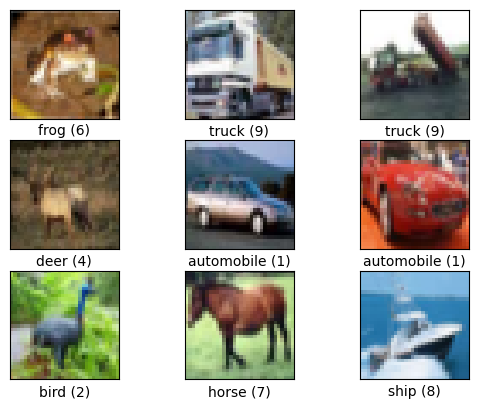

In [18]:
# personal test
# view sample images

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i])
    plt.xlabel(f"{label_classification[train_label[i][0]]} ({train_label[i][0]})")

In [19]:
# creating the training model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [20]:
# compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
# fit the model
model.fit(train_img, train_label, epochs=10, validation_data=(test_img, test_label))

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5412 - accuracy: 0.4354 - val_loss: 1.2400 - val_accuracy: 0.5512
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1767 - accuracy: 0.5831 - val_loss: 1.0892 - val_accuracy: 0.6145
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0266 - accuracy: 0.6391 - val_loss: 1.0441 - val_accuracy: 0.6400
Epoch 4/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.9391 - accuracy: 0.6706 - val_loss: 0.9703 - val_accuracy: 0.6585
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8642 - accuracy: 0.6974 - val_loss: 0.9666 - val_accuracy: 0.6646
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8062 - accuracy: 0.7188 - val_loss: 0.9215 - val_accuracy: 0.6765
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7620 - accuracy: 0.7339 - val_loss: 0.8578 -

In [22]:
loss, accuracy = model.evaluate(test_img, test_label)
print(f'loss: {loss}')
print(f'acuracy{accuracy}')

313/313 [==============================] - 7s 21ms/step - loss: 0.8629 - accuracy: 0.7077
loss: 0.8628826141357422
acuracy0.7077000141143799


In [ ]:
model.save('models/im')